In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
#from keras.callbacks import EarlyS
from keras.callbacks import EarlyStopping

In [3]:
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

In [4]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

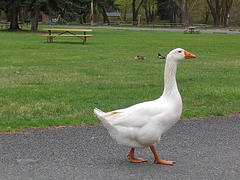

In [5]:
real_image_path = 'C:/Users/GOWRI/Jupiter/Major Project/CASIA2/Au/Au_ani_10101.jpg'
Image.open(real_image_path)

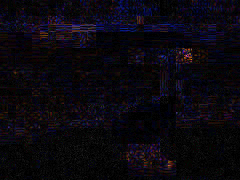

In [6]:
convert_to_ela_image(real_image_path, 90)

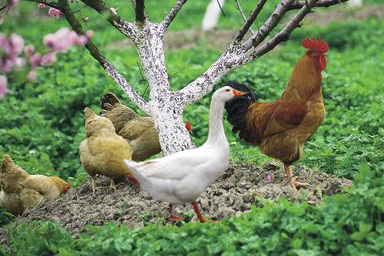

In [7]:
fake_image_path = 'C:/Users/GOWRI/Jupiter/Major Project/CASIA2/Tp/Tp_D_CRN_M_N_ani00100_ani10101_10089.jpg'
Image.open(fake_image_path)

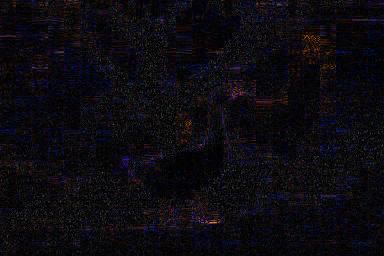

In [8]:
convert_to_ela_image(fake_image_path, 90)

In [9]:
# DENOISING REAL IMAGE

In [9]:
# Color-image denoising
from skimage.restoration import (denoise_wavelet,estimate_sigma)
from skimage.util import random_noise
# from sklearn.metrics import peak_signal_noise_ratio
import skimage.io

img_r=skimage.io.imread('C:/Users/GOWRI/Jupiter/Major Project/CASIA2/Au/Au_ani_10101.jpg')
img_r=skimage.img_as_float(img_r) #converting image as float

#sigma=0.35 #noise
#imgn=random_noise(img,var=sigma**2) # adding noise

sigma_est=estimate_sigma(img_r,multichannel=True,average_sigmas=True)  #Noise estimation

# Denoising using Bayes
img_bayes=denoise_wavelet(img_r,method='BayesShrink',mode='soft',wavelet_levels=3,
                          wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)


#Denoising using Visushrink
img_visushrink=denoise_wavelet(img_r,method='VisuShrink',mode='soft',sigma=sigma_est/3,wavelet_levels=5,
                               wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)

C:\Users\GOWRI\AppData\Local\Temp\ipykernel_10896\139131533.py:13: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est=estimate_sigma(img_r,multichannel=True,average_sigmas=True)  #Noise estimation
C:\Users\GOWRI\AppData\Local\Temp\ipykernel_10896\139131533.py:16: FutureWarning: `multichannel` is a deprecated argument name for `denoise_wavelet`. It will be removed in version 1.0. Please use `channel_axis` instead.
  img_bayes=denoise_wavelet(img_r,method='BayesShrink',mode='soft',wavelet_levels=3,
C:\Users\GOWRI\anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\GOWRI\AppData\Local\Temp\ipykernel_10896\139131533.py:21: FutureWarning: `multichannel` is a deprecated argument name for `denoise_wavelet`. It will be removed in version 1.0. Please use `channel_ax

In [11]:
import cv2
psnr_noisy = cv2.PSNR(img_r,img_r)
print(psnr_noisy)

psnr_bayes = cv2.PSNR(img_r,img_bayes)
print(psnr_bayes)

psnr_visu = cv2.PSNR(img_r,img_visushrink)
print(psnr_bayes)

361.20199909921956
102.66999649085683
102.66999649085683


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


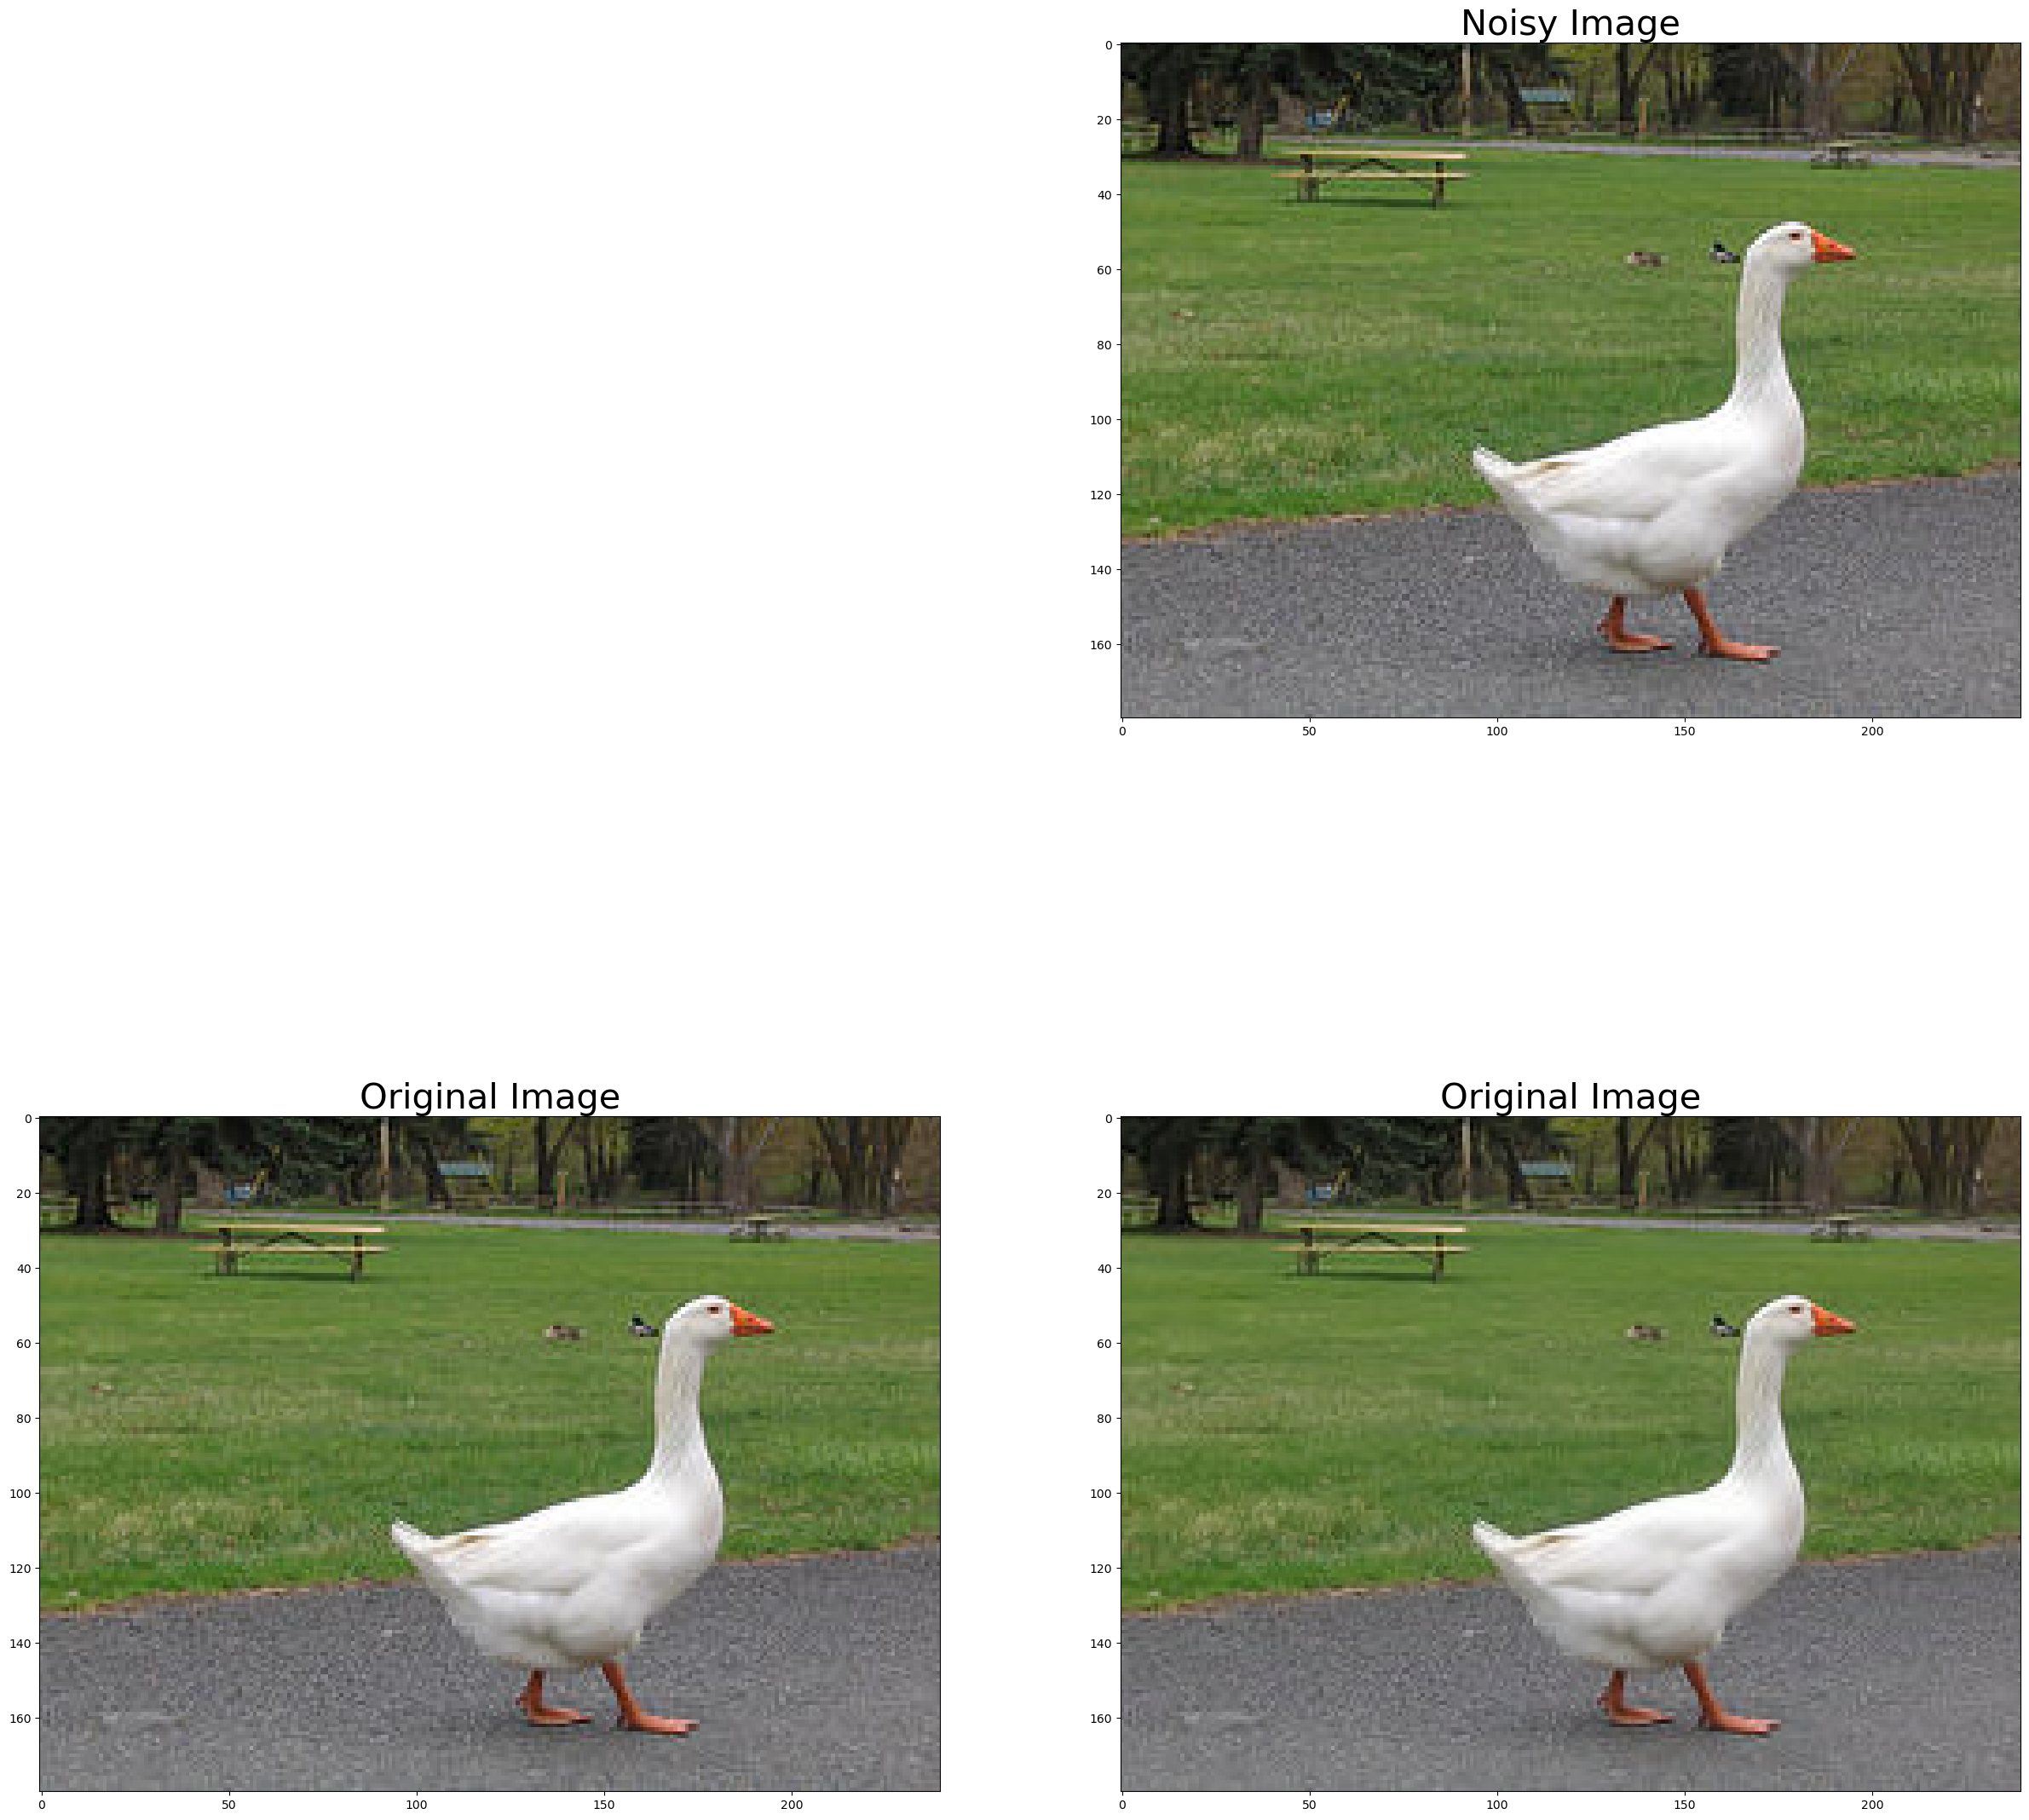

In [12]:
# Plotting images
plt.figure(figsize=(30,30))

# plt.subplot(2,2,1)
# plt.imshow(img,cmap=plt.cm.gray)
# plt.title('Original Image',fontsize=30)

plt.subplot(2,2,2)
plt.imshow(img_r,cmap=plt.cm.gray)
plt.title('Noisy Image',fontsize=30)

plt.subplot(2,2,3)
plt.imshow(img_bayes,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.subplot(2,2,4)
plt.imshow(img_visushrink,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.show()

In [14]:
print('PSNR[Original vs. Noisy Image]', psnr_noisy)
print('PSNR[Original vs. Denoised(VisuShrink)]', psnr_visu)
print('PSNR[Original vs. Denoised(Bayes)]', psnr_bayes)

PSNR[Original vs. Noisy Image] 361.20199909921956
PSNR[Original vs. Denoised(VisuShrink)] 87.57836686301036
PSNR[Original vs. Denoised(Bayes)] 102.66999649085683


In [14]:
#DENOISING FAKE IMAGE

In [15]:
# Color-image denoising
from skimage.restoration import (denoise_wavelet,estimate_sigma)
from skimage.util import random_noise
# from sklearn.metrics import peak_signal_noise_ratio
import skimage.io

img_f=skimage.io.imread('C:/Users/GOWRI/Jupiter/Major Project/CASIA2/Tp/Tp_D_CRN_M_N_ani00100_ani10101_10089.jpg')
img_f=skimage.img_as_float(img_f) #converting image as float

#sigma=0.35 #noise
#imgn=random_noise(img,var=sigma**2) # adding noise

sigma_est=estimate_sigma(img_f,multichannel=True,average_sigmas=True)  #Noise estimation

# Denoising using Bayes
img_bayes=denoise_wavelet(img_f,method='BayesShrink',mode='soft',wavelet_levels=3,
                          wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)


#Denoising using Visushrink
img_visushrink=denoise_wavelet(img_f,method='VisuShrink',mode='soft',sigma=sigma_est/3,wavelet_levels=5,
                               wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)

C:\Users\GOWRI\AppData\Local\Temp\ipykernel_10896\2901582554.py:13: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est=estimate_sigma(img_f,multichannel=True,average_sigmas=True)  #Noise estimation
C:\Users\GOWRI\AppData\Local\Temp\ipykernel_10896\2901582554.py:16: FutureWarning: `multichannel` is a deprecated argument name for `denoise_wavelet`. It will be removed in version 1.0. Please use `channel_axis` instead.
  img_bayes=denoise_wavelet(img_f,method='BayesShrink',mode='soft',wavelet_levels=3,
C:\Users\GOWRI\AppData\Local\Temp\ipykernel_10896\2901582554.py:21: FutureWarning: `multichannel` is a deprecated argument name for `denoise_wavelet`. It will be removed in version 1.0. Please use `channel_axis` instead.
  img_visushrink=denoise_wavelet(img_f,method='VisuShrink',mode='soft',sigma=sigma_est/3,wavelet_levels=5,


In [16]:
import cv2
psnr_noisy = cv2.PSNR(img_f,img_f)
print(psnr_noisy)

psnr_bayes = cv2.PSNR(img_f,img_bayes)
print(psnr_bayes)

psnr_visu = cv2.PSNR(img_f,img_visushrink)
print(psnr_bayes)

361.20199909921956
103.52379038532311
103.52379038532311


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


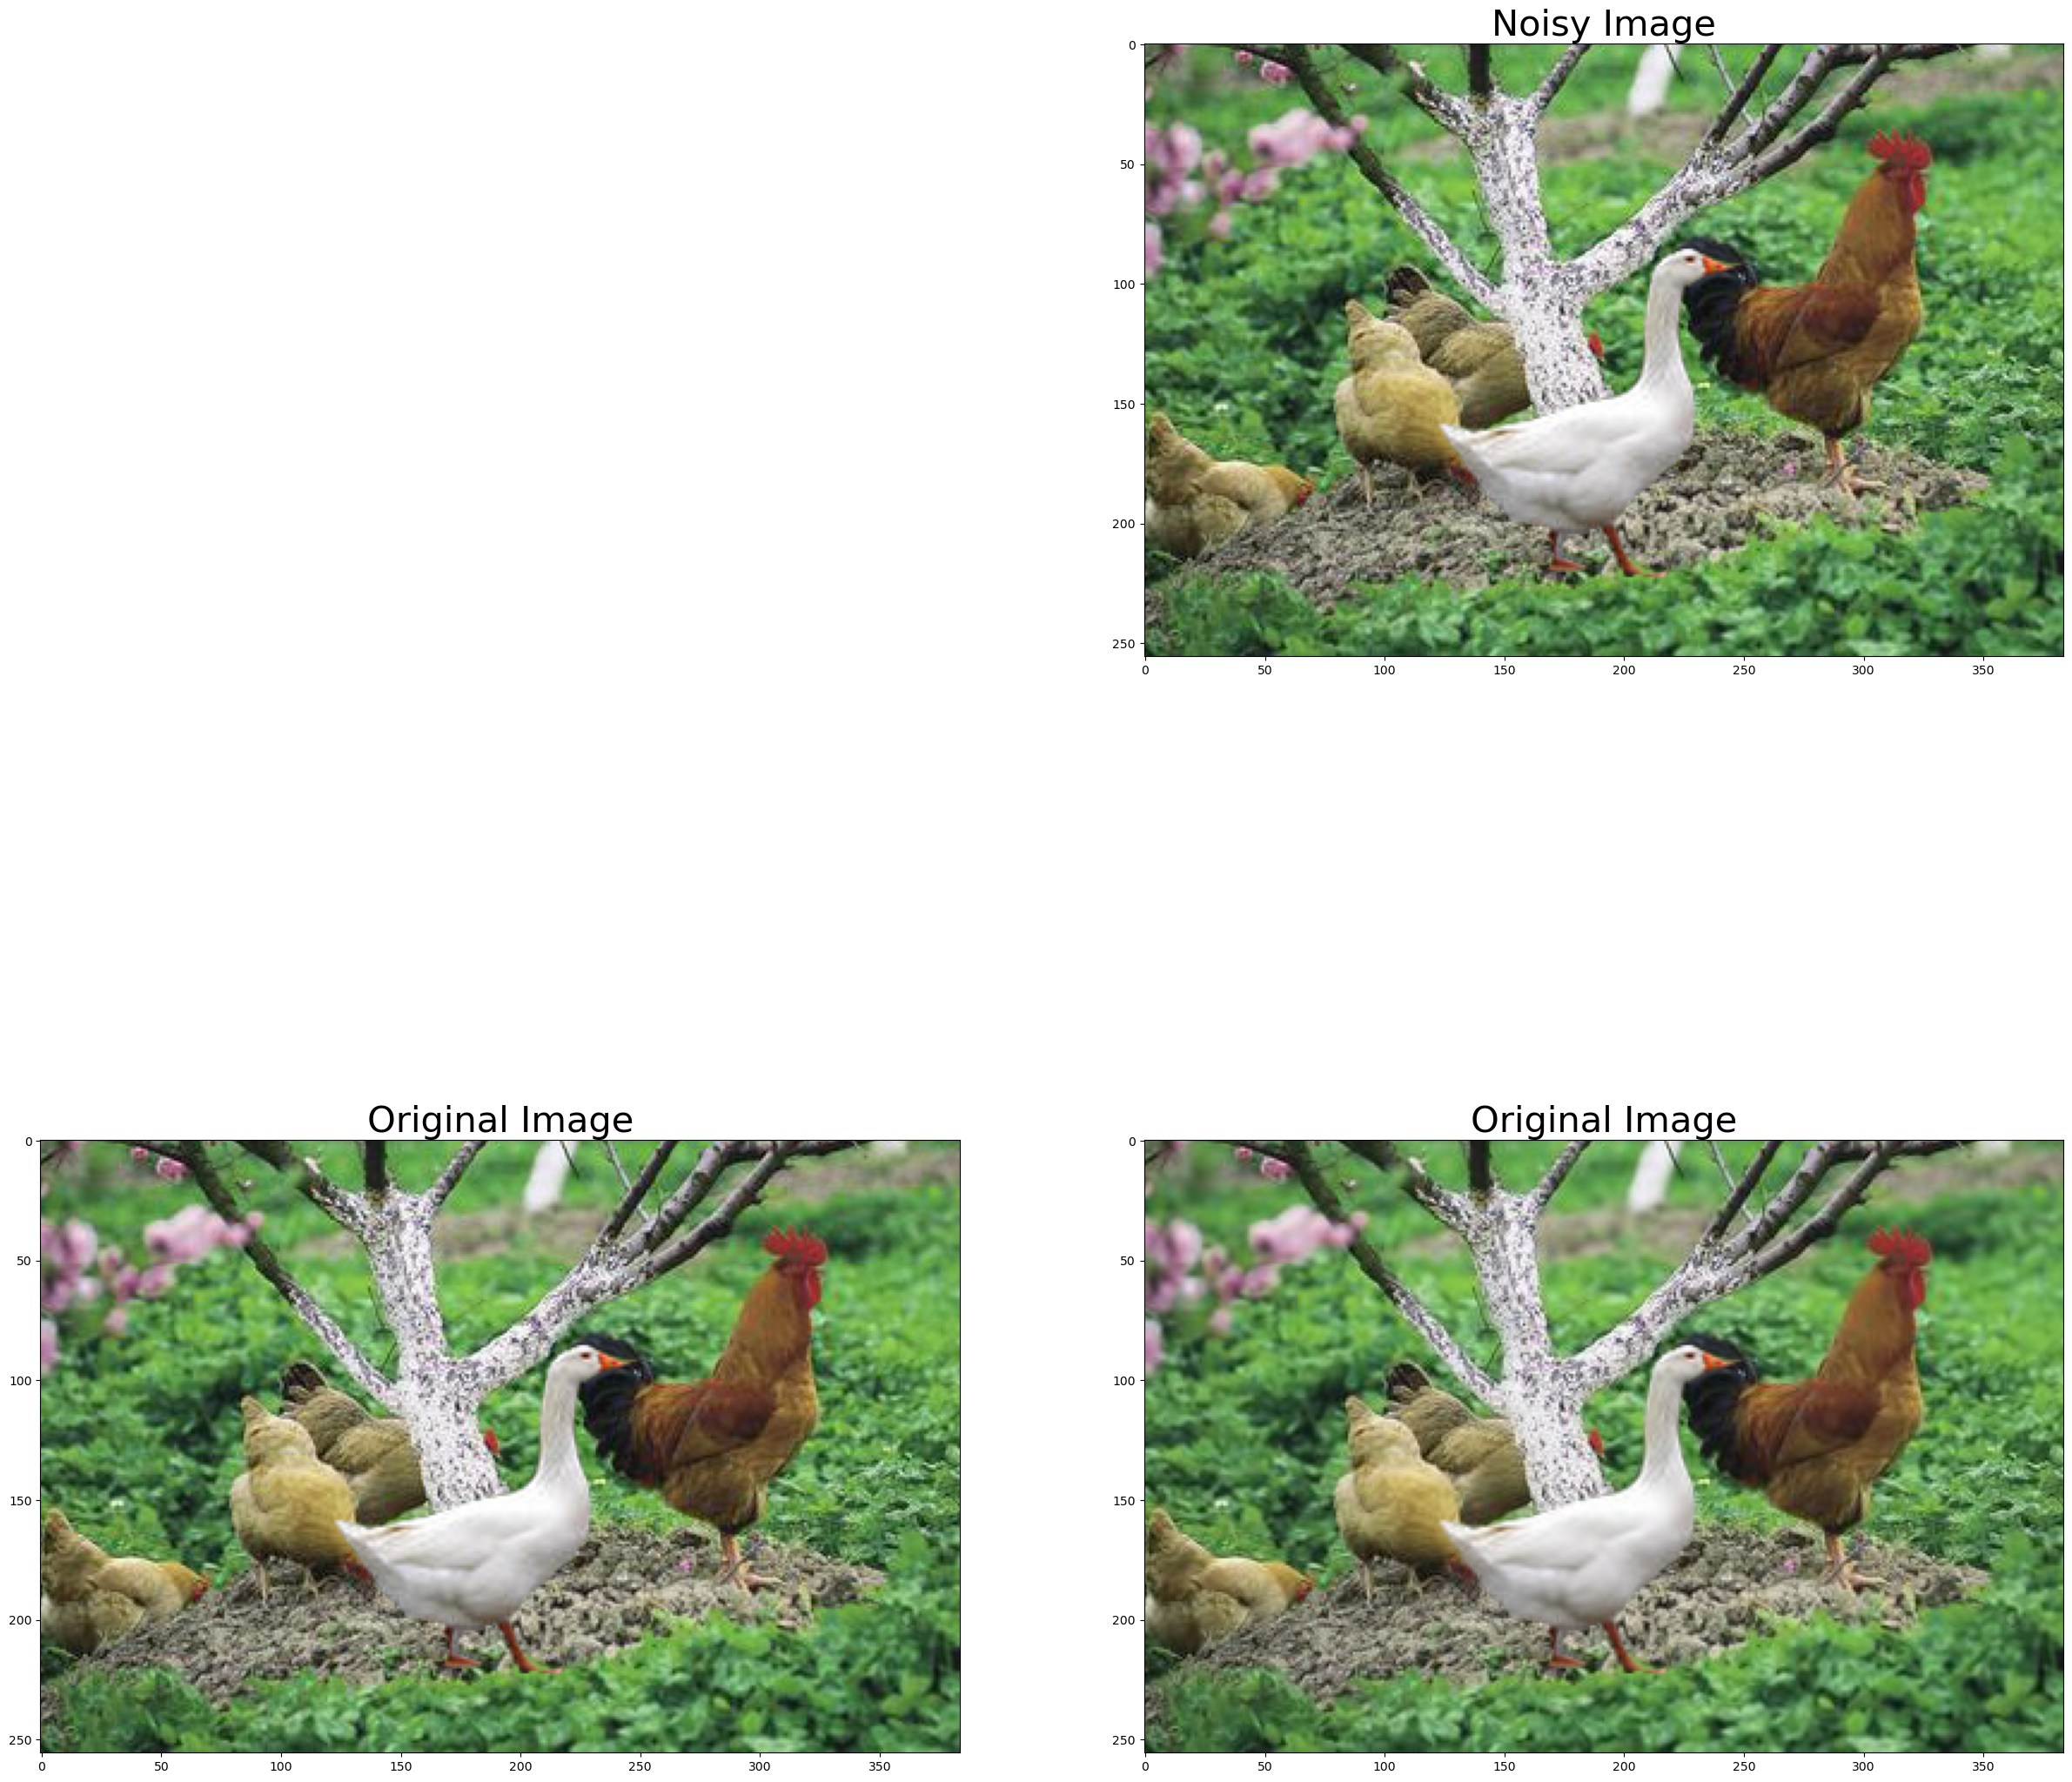

In [17]:
# Plotting images
plt.figure(figsize=(30,30))

# plt.subplot(2,2,1)
# plt.imshow(img,cmap=plt.cm.gray)
# plt.title('Original Image',fontsize=30)

plt.subplot(2,2,2)
plt.imshow(img_f,cmap=plt.cm.gray)
plt.title('Noisy Image',fontsize=30)

plt.subplot(2,2,3)
plt.imshow(img_bayes,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.subplot(2,2,4)
plt.imshow(img_visushrink,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.show()

In [18]:
print('PSNR[Original vs. Noisy Image]', psnr_noisy)
print('PSNR[Original vs. Denoised(VisuShrink)]', psnr_visu)
print('PSNR[Original vs. Denoised(Bayes)]', psnr_bayes)

PSNR[Original vs. Noisy Image] 361.20199909921956
PSNR[Original vs. Denoised(VisuShrink)] 84.5637668267639
PSNR[Original vs. Denoised(Bayes)] 103.52379038532311


In [19]:
# Now here we r writing a function for deionisation
# Color-image denoising
from skimage.restoration import (denoise_wavelet,estimate_sigma)
from skimage.util import random_noise
# from sklearn.metrics import peak_signal_noise_ratio
import skimage.io

In [20]:
def denoise_img(img):
    #img=skimage.io.imread('../input/casia-dataset/CASIA2/Tp/Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg')
    img=skimage.img_as_float(img_f) #converting image as float


    sigma_est=estimate_sigma(img,multichannel=True,average_sigmas=True)  #Noise estimation

    # Denoising using Bayes
    img_bayes=denoise_wavelet(img,method='BayesShrink',mode='soft',wavelet_levels=3,
                          wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)


    #Denoising using Visushrink
    img_visushrink=denoise_wavelet(img,method='VisuShrink',mode='soft',sigma=sigma_est/3,wavelet_levels=5,
    wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)
    return img_bayes 

In [5]:
image_size = (128, 128)

In [6]:
def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 90).resize(image_size)).flatten() / 255.0

In [26]:
# here importing regularizers for SVM classification
#from tensorflow.keras.regularizers import l2
from keras.regularizers import l2

In [27]:
X = [] # ELA converted images
Y = [] # 0 for fake, 1 for real

In [28]:
import random
path = 'C:/Users/GOWRI/Jupiter/Major Project/CASIA2/Au'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(1)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

random.shuffle(X)
X = X[:2100]
Y = Y[:2100]
print(len(X), len(Y))

Processing 500 images
Processing 1000 images
Processing 1500 images
Processing 2000 images
Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images
Processing 4500 images
Processing 5000 images
Processing 5500 images
Processing 6000 images
Processing 6500 images
Processing 7000 images
2100 2100


In [29]:
path2 = 'C:/Users/GOWRI/Jupiter/Major Project/CASIA2/Tp'
for dirname, _, filenames in os.walk(path2):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(0)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

print(len(X), len(Y))

Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images
Processing 4500 images
Processing 5000 images
Processing 5500 images
Processing 6000 images
Processing 6500 images
Processing 7000 images
7220 7220


In [30]:
import numpy as np
X = np.array(X)
Y = to_categorical(Y, 2)
X = X.reshape(-1, 128, 128, 3)

In [31]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)
X = X.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

5776 5776
1444 1444


In [32]:
def build_model():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = 'softmax'))
    return model

In [33]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 flatten (Flatten)           (None, 115200)            0         
                                                                 
 dense (Dense)               (None, 256)               29491456  
                                                        

In [37]:
from keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

In [34]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
x_train2 = np.array(X_train, copy=True) 
y_train2 = np.array(Y_train, copy=True) 

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    fill_mode='nearest',
    validation_split = 0.2)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)

datagen.fit(X_train)

print(type(X_train))

#earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='min')

validation_generator = datagen.flow(x_train2, y_train2, batch_size=32, subset='validation')
train_generator = datagen.flow(x_train2, y_train2,batch_size=32, subset='training')


# # fits the model on batches with real-time data augmentation:
#history = model.fit_generator(train_generator, epochs=epochs, validation_data = (X_val,Y_val), verbose = 1,callbacks = [early_stopping])

<class 'numpy.ndarray'>


In [38]:
epochs = 20
import tensorflow as tf
batch_size = 32
init_lr = 1e-4
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = init_lr, decay = init_lr/epochs)

In [36]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
early_stopping = EarlyStopping(monitor = 'val_acc', min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [39]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])

Epoch 1/20
181/181 [==============================] - 241s 1s/step - loss: 0.5589 - accuracy: 0.7566 - val_loss: 0.4723 - val_accuracy: 0.7825
Epoch 2/20
181/181 [==============================] - 239s 1s/step - loss: 0.4587 - accuracy: 0.7902 - val_loss: 0.4453 - val_accuracy: 0.7853
Epoch 3/20
181/181 [==============================] - 236s 1s/step - loss: 0.4191 - accuracy: 0.8083 - val_loss: 0.4134 - val_accuracy: 0.8269
Epoch 4/20
181/181 [==============================] - 234s 1s/step - loss: 0.3846 - accuracy: 0.8324 - val_loss: 0.3912 - val_accuracy: 0.8366
Epoch 5/20
181/181 [==============================] - 245s 1s/step - loss: 0.3459 - accuracy: 0.8606 - val_loss: 0.3799 - val_accuracy: 0.8324
Epoch 6/20
181/181 [==============================] - 242s 1s/step - loss: 0.3029 - accuracy: 0.8849 - val_loss: 0.3630 - val_accuracy: 0.8476
Epoch 7/20
181/181 [==============================] - 231s 1s/step - loss: 0.2697 - accuracy: 0.8970 - val_loss: 0.3365 - val_accuracy: 0.8733

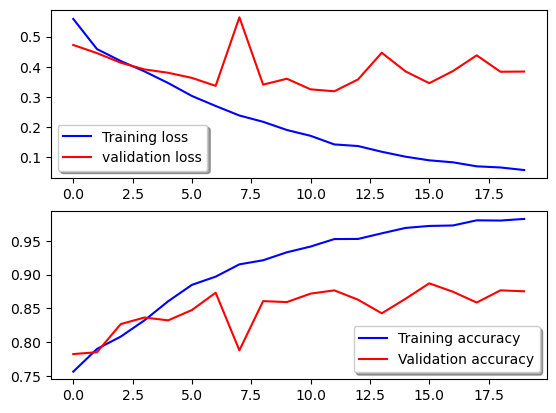

In [40]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

27/27 [==============================] - 2s 84ms/step


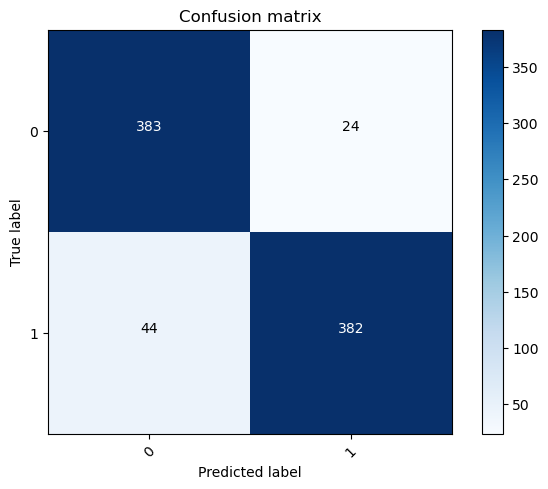

In [48]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [42]:
class_names = ['fake', 'real']

In [43]:
#predicting the real image
real_image_path = 'C:/Users/GOWRI/Jupiter/Major Project/CASIA2/Au/Au_ani_00001.jpg'
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

1/1 [==============================] - 0s 116ms/step
Class: real Confidence: 99.98


In [44]:
#predicting fake image
fake_image_path = 'C:/Users/GOWRI/Jupiter/Major Project/CASIA2/Tp/Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg'
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

1/1 [==============================] - 0s 33ms/step
Class: fake Confidence: 99.75


In [46]:
#Now predicting with my images
fake_image_path1 = 'C:/Users/GOWRI/Jupiter/Major Project/CASIA2/Tp/Tp_D_CRN_M_N_nat10156_ani00001_12021.jpg'
image = prepare_image(fake_image_path1)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

1/1 [==============================] - 0s 33ms/step
Class: fake Confidence: 100.00


In [47]:
fake_image_path2 = 'C:/Users/GOWRI/Jupiter/Major Project/CASIA2/Tp/Tp_D_CRN_M_N_ani10120_ani00100_11639.jpg'
image = prepare_image(fake_image_path2)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

1/1 [==============================] - 0s 33ms/step
Class: fake Confidence: 100.00


In [50]:
fake_image_path3 = 'C:/Users/GOWRI/Jupiter/Major Project/CASIA2/Tp/Tp_D_CRN_M_N_ani10101_ani00081_10139.jpg'
image1 = prepare_image(fake_image_path3)
image2 = image1.reshape(-1, 128, 128, 3)
y_pred = model.predict(image2)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

1/1 [==============================] - 0s 33ms/step
Class: fake Confidence: 99.92


In [51]:
real_image_pat12 = 'C:/Users/GOWRI/Jupiter/Major Project/CASIA2/Au/Au_ani_30701.jpg'
image = prepare_image(real_image_path1)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

1/1 [==============================] - 0s 36ms/step
Class: real Confidence: 77.37


In [53]:
sample_img = 'C:/Users/GOWRI/Jupiter/Major Project/uploads/fake.jpg'
image = prepare_image(sample_img)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

1/1 [==============================] - 0s 34ms/step
Class: fake Confidence: 58.36


In [55]:
sample_img1 = 'C:/Users/GOWRI/Jupiter/Major Project/uploads/edited.jpg'
image = prepare_image(sample_img1)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

1/1 [==============================] - 0s 33ms/step
Class: fake Confidence: 100.00


In [56]:
sample_img3 = 'C:/Users/GOWRI/Jupiter/Major Project/uploads/wp9415441-madara-uchiha-iphone-wallpapers.jpg'
image = prepare_image(sample_img3)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

1/1 [==============================] - 0s 34ms/step
Class: real Confidence: 86.86


In [57]:
model.save("image_model.h5")

In [58]:
model.save("image_model2.hdf5")

In [7]:
#LOADING THE MODEL
import tensorflow as tf
model_new = tf.keras.models.load_model("C:/Users/GOWRI/Jupiter/Major Project/image_model.h5")

In [8]:
#Now predicting the new images by loading the saved model
class_names = ['fake', 'real']

In [85]:
#Now predicting with my images
real_image_path1 = 'C:/Users/GOWRI/Jupiter/Major Project/uploads/fake.jpg'
image = prepare_image(real_image_path1)
image = image.reshape(-1, 128, 128, 3)
y_pred = model_new.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(y_pred)
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

1/1 [==============================] - 0s 33ms/step
[[0.5835609  0.41643915]]
Class: real Confidence: 58.36


In [13]:
fake_image_path1 = 'C:/Users/GOWRI/Jupiter/Major Project/CASIA2/Tp/Tp_D_CRN_M_N_ani10120_ani00100_11639.jpg'
image = prepare_image(fake_image_path1)
image = image.reshape(-1, 128, 128, 3)
y_pred = model_new.predict(image)
print(y_pred)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

1/1 [==============================] - 0s 50ms/step
[[1.000000e+00 9.908654e-13]]
Class: fake Confidence: 100.00


In [12]:
# testing the Model with external images
org_img ='C:/Users/GOWRI/Jupiter/Major Project/CASIA2/Au/Au_ani_00100.jpg'
img = prepare_image(org_img)
image=image.reshape(-1,128,128,3)
y_pred = model_new.predict(image)
y_pred_class = np.argmax(y_pred,axis=1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred)*100:0.2f}')

1/1 [==============================] - 0s 57ms/step
Class: real Confidence: 86.86


In [11]:
sample_img3 = 'C:/Users/GOWRI/Jupiter/Major Project/uploads/wp9415441-madara-uchiha-iphone-wallpapers.jpg'
image = prepare_image(sample_img3)
image = image.reshape(-1, 128, 128, 3)
y_pred = model_new.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

1/1 [==============================] - 0s 57ms/step
Class: real Confidence: 86.86
